## About dataset:
It is taken from Kaggle. It contains sales data of mobile phones of various companies. It has different features of phones and its corresponding price range. We have to find out relation between features of a mobile phone and its selling price. In this problem we do not have to predict actual price but a price range indicating how high the price is. There are 4 classes in the price range, namely,  0(low cost), 1(medium cost), 2(high cost) and 3(very high cost). Our task is to make a model which can predict price range based on its features.

Dataset: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

## Problem statement:
To predict price range of mobile phone based of its features. 

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Import data

In [2]:
df = pd.read_csv("train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Explore data

In [3]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

#### Columns Description:
|Feature|Description|
|:--------------:|:------------:|
|battery_power|Total energy a battery can store in one time measured in mAh|
|blue|Has bluetooth or not|
|clock_speed|Speed at which microprocessor executes instructions|
|dual_sim|Has dual sim support or not|
|fc|Front Camera mega pixels|
|four_g|Has 4G or not|
|int_memory|Internal Memory in Giga Bytes|
|m_dep|Mobile Depth in cm|
|mobile_wt|Weight of mobile phone|
|n_cores|Number of core processors|
|pc|Primary Camera mega pixels|
|px_height|Pixel Resolution Height|
|px_width|Pixel Resolution Width|
|ram|Random Access Memory in Mega Bytes|
|sc_h|Screen Height of mobile in cm|
|sc_w|Screen Width of mobile in cm|
|talk_time|Longest time that a single battery charge will last|
|three_g|Has 3G or not|
|touch_screen|Has touch screen or not|
|wifi|Has wifi or not|
|price_range|This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)|

In [4]:
df.shape

(2000, 21)

In [5]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
df.duplicated().sum()

0

## Observation:
* There are 2000 rows and 21 columns.
* There are no missing values in the dataset.
* There are no duplicates as well.
* All the columns are numerical in nature.

## Data Vizualization

<AxesSubplot:>

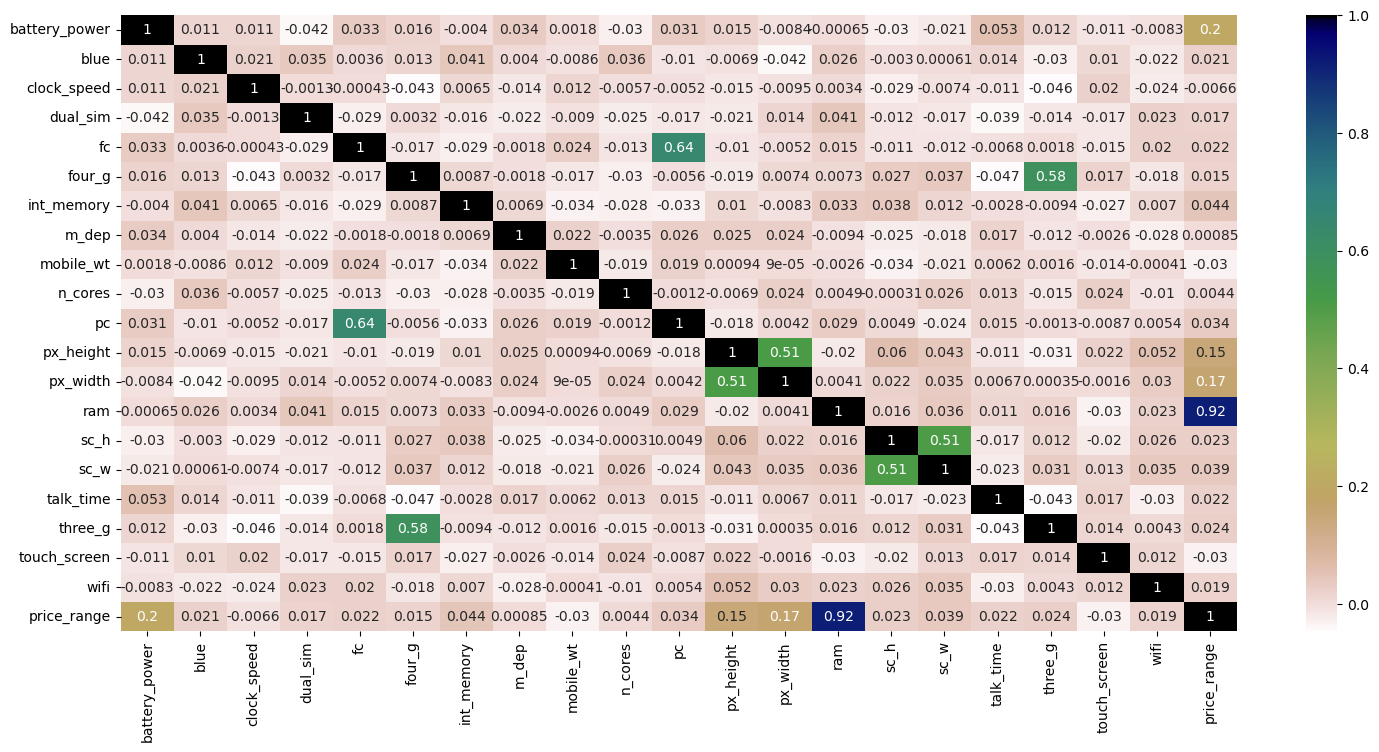

In [9]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(), annot=True, cmap='gist_earth_r')

The target variable 'price_range' is strongly correlated to ram. It means higher the ram, higher is the price of a phone.

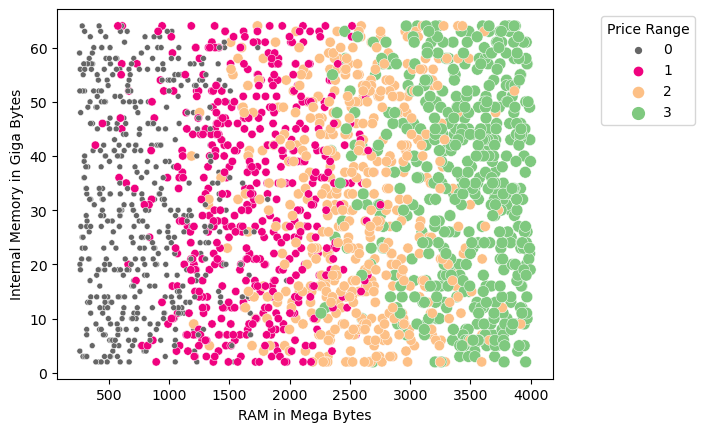

In [10]:
plot = sns.scatterplot(df['ram'], df['int_memory'], size = df['price_range'],
                       hue = df['price_range'], size_order = [2,4,6,8], palette = 'Accent_r')
sns.move_legend(plot, 'upper right', bbox_to_anchor=(1.3,1), title = 'Price Range')
plt.xlabel('RAM in Mega Bytes')
plt.ylabel('Internal Memory in Giga Bytes')
plt.show()

Above plot shows that, higher ram fetches higher price. While internal memory do not affect price much.

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

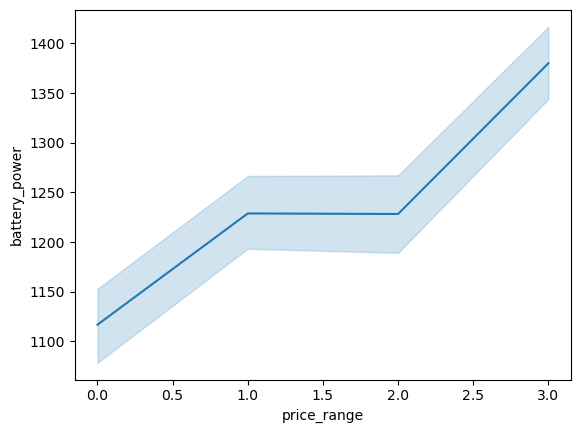

In [11]:
sns.lineplot(df['price_range'],df['battery_power'])

For durable batteries, price is high. 

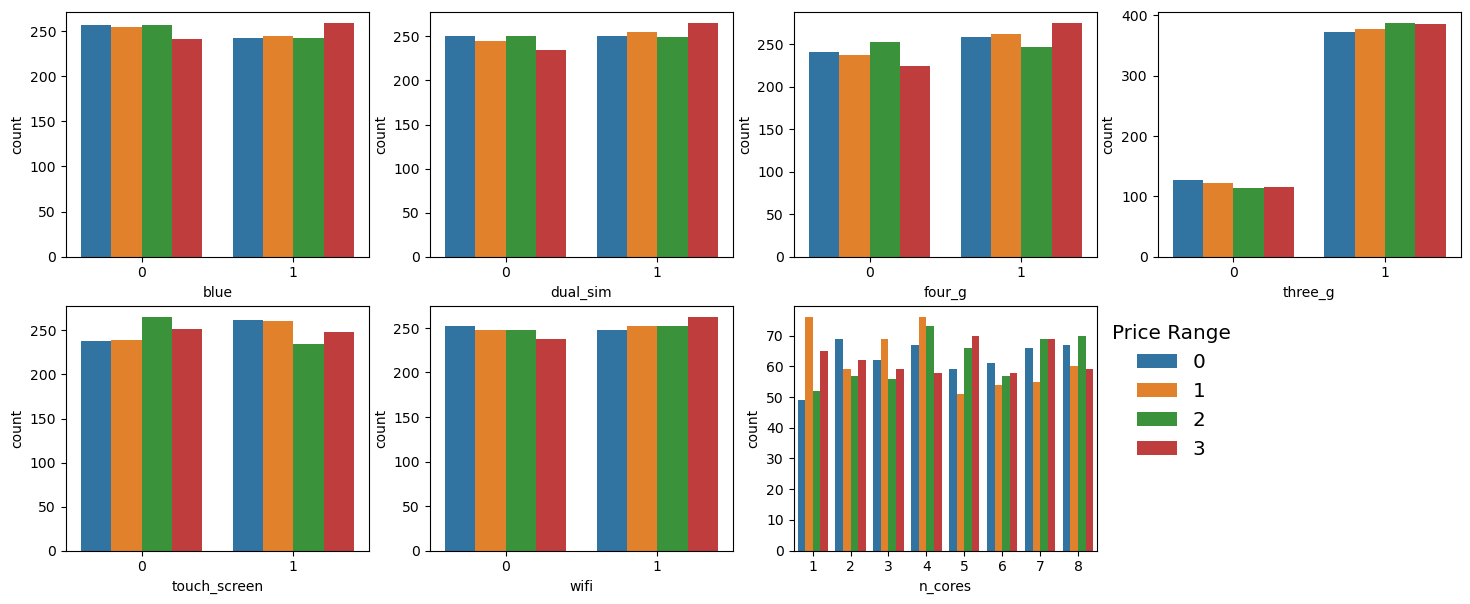

In [12]:
col = ['blue', 'dual_sim', 'four_g', 'three_g','touch_screen','wifi','n_cores']
plt.figure(figsize=(18,7))
for i in range(7):
    plt.subplot(2,4,i+1)
    if i<6:
        sns.countplot(data=df, x=col[i], hue = df["price_range"])
        plt.legend([],[],frameon=False)
    else:
        sns.countplot(data=df, x=col[i], hue = df["price_range"])
        plt.legend(title='Price Range', bbox_to_anchor=(1.5,1), frameon=False, title_fontsize = 'x-large', fontsize='x-large')
    
plt.show()

These countplots give relation between the features mentioned in 'col' and price range. The presence of these features in the phone does not affect the price range much. It is observed that phones with 3G feature are sold more than those with no 3G feature.

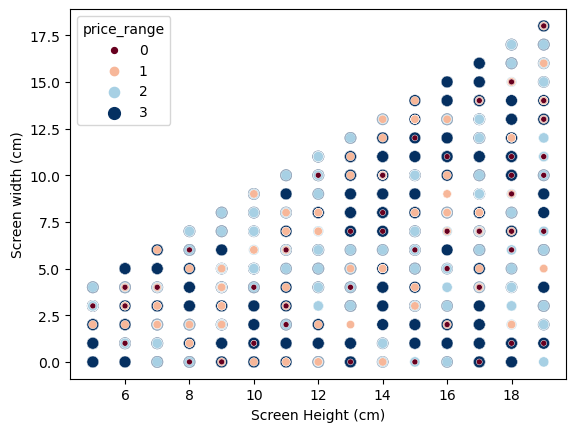

In [13]:
sns.scatterplot(df['sc_h'], df['sc_w'], hue = df['price_range'], size = df['price_range'], palette = 'RdBu')
plt.xlabel('Screen Height (cm)')
plt.ylabel('Screen width (cm)')
plt.show()

Though there are mobile phones with low screen width as well as height in high price range, the count of mobile phones in high price range are more who have longer height and width.

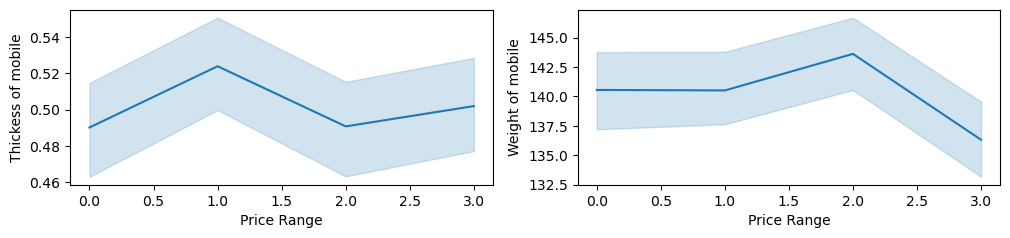

In [14]:
plt.figure(figsize=(12,5))

plt.subplot(2,2,1)
sns.lineplot(df['price_range'],df['m_dep'])
plt.xlabel('Price Range')
plt.ylabel('Thickess of mobile')

plt.subplot(2,2,2)
sns.lineplot(df['price_range'],df['mobile_wt'])
plt.xlabel('Price Range')
plt.ylabel('Weight of mobile')

plt.show()

Lightweight and slim mobiles are sold more.

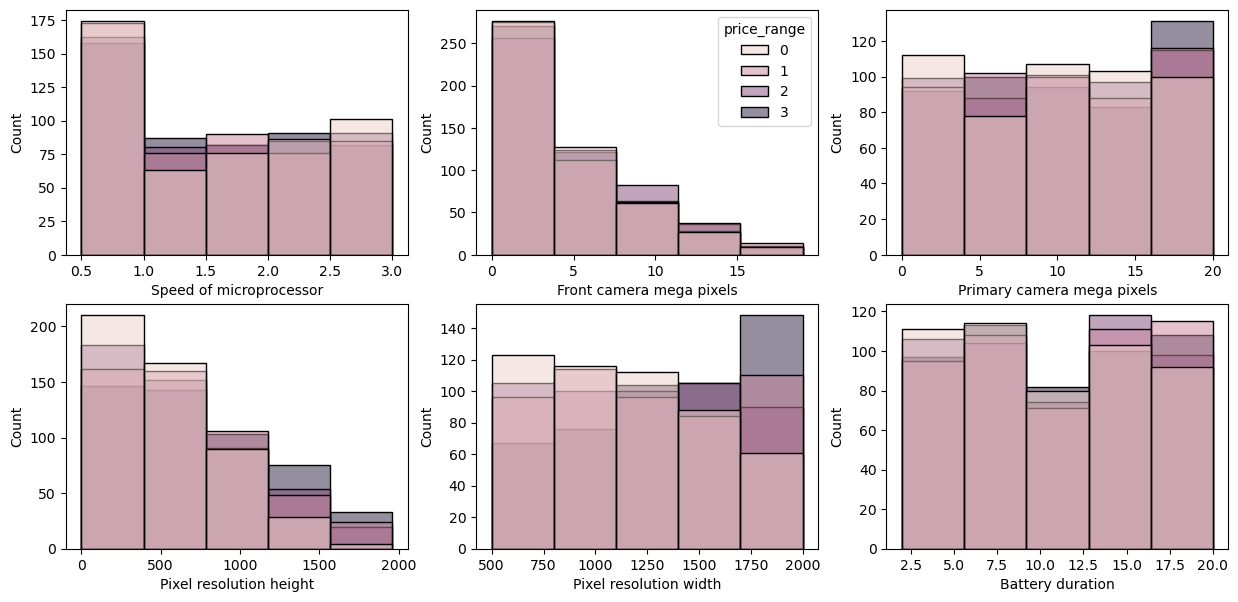

In [15]:
col_list = ['clock_speed', 'fc', 'pc', 'px_height','px_width','talk_time']
labels = ['Speed of microprocessor', 'Front camera mega pixels', 'Primary camera mega pixels', 
          'Pixel resolution height', 'Pixel resolution width', 'Battery duration']
plt.figure(figsize=(15,7))
for i in range(6):
    plt.subplot(2,3,i+1)
    if i!=1:
        sns.histplot(x = df[col_list[i]], hue = df['price_range'], bins = 5)
        plt.legend([],[],frameon=False)
        plt.xlabel(labels[i])
    else:
        sns.histplot(x = df[col_list[i]], hue = df['price_range'], bins = 5)
        plt.xlabel(labels[i])
    
plt.show()

High price range mobile phones have speed of microprocessor between 1 to 1.5, primary camera resolution between 16 to 20 mega pixels, wider and longer pixel resolution, and long battery duration.

## Building model: Logistic Regression

In [16]:
# Define x and y
x = df.drop("price_range", axis = 1)
y = df["price_range"]

In [17]:
# Splitting data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.35, random_state = 42)

In [18]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = pd.DataFrame(ss.fit_transform(x_train))
x_test = pd.DataFrame(ss.transform(x_test))

In [19]:
# Initializing model
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
# Fitting training data
log_model.fit(x_train, y_train)

LogisticRegression()

In [20]:
# Prediction
ypredtest = log_model.predict(x_test)

In [21]:
# Evaluation using sklearn metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy of the model is {}%.".format(round(accuracy_score(y_test, ypredtest)*100,2)))
print('--------------------------------------------------------------')
print('Confusion matrix: \n',confusion_matrix(y_test, ypredtest))
print('--------------------------------------------------------------')
print('Classification report: \n',classification_report(y_test, ypredtest))

Accuracy of the model is 96.14%.
--------------------------------------------------------------
Confusion matrix: 
 [[169   8   0   0]
 [  3 166   2   0]
 [  0   7 162   5]
 [  0   0   2 176]]
--------------------------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       177
           1       0.92      0.97      0.94       171
           2       0.98      0.93      0.95       174
           3       0.97      0.99      0.98       178

    accuracy                           0.96       700
   macro avg       0.96      0.96      0.96       700
weighted avg       0.96      0.96      0.96       700



#### Accuracy of this model is 96% !!